In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

Read dataset and get overall insight on the data

In [2]:
url = 'https://uu-sml.github.io/course-sml-public/data/email.csv'
email = pd.read_csv(url)
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

Create a training set containing a random sample of $75\%$ of the observations, and a test set containing the remaining observations.

In [3]:
dataset_size = email.shape[0]
trainIndex = np.random.choice(dataset_size, size=int(0.75*dataset_size), replace=False)
train_dataset = email.iloc[trainIndex]
test_dataset = email.iloc[~email.index.isin(trainIndex)]

Separate the datasets into features and labels (i.e., column `Class`)

In [4]:
train_x, train_y = train_dataset.drop(columns=['Class'], inplace=False), train_dataset['Class']
test_x, test_y = test_dataset.drop(columns=['Class'], inplace=False), test_dataset['Class']

Fit a classification tree and compute the confusion matrix.

|--- feature_51 <= 0.08
|   |--- feature_6 <= 0.02
|   |   |--- feature_52 <= 0.16
|   |   |   |--- feature_15 <= 0.11
|   |   |   |   |--- feature_23 <= 0.01
|   |   |   |   |   |--- feature_21 <= 0.10
|   |   |   |   |   |   |--- feature_27 <= 7.11
|   |   |   |   |   |   |   |--- feature_5 <= 0.78
|   |   |   |   |   |   |   |   |--- feature_4 <= 1.62
|   |   |   |   |   |   |   |   |   |--- feature_20 <= 1.47
|   |   |   |   |   |   |   |   |   |   |--- feature_10 <= 0.99
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_10 >  0.99
|   |   |   |   |   |   |   |   |   |   |   |--- class: Spam
|   |   |   |   |   |   |   |   |   |--- feature_20 >  1.47
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.14
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  0.14
|   |   |   |   |   |   |   |   |   |   |   |--- trunc

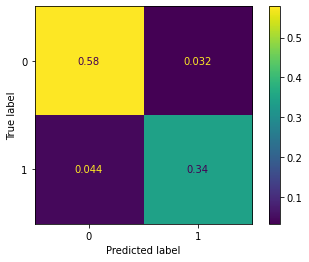

In [22]:
tree_classifier = DecisionTreeClassifier(max_depth=12)
tree_classifier.fit(train_x, train_y)
print(export_text(tree_classifier))
predictions = tree_classifier.predict(test_x)
ConfusionMatrixDisplay.from_predictions(y_true = test_y, y_pred=predictions, normalize='all')

Use the bagging approach to learn a classifier `sklearn.ensemble.BaggingClassifier()` and compute the confusion matrix.

Out-of-bag accuracy estimate: 0.9347826086956522


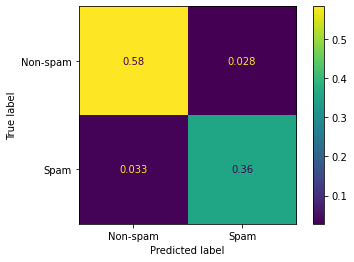

In [41]:
bagging_classifier = BaggingClassifier(n_estimators=20, max_samples=0.7, oob_score=True)
bagging_classifier.fit(train_x, train_y)
print(f'Out-of-bag accuracy estimate: {bagging_classifier.oob_score_}')
predictions = bagging_classifier.predict(test_x)
ConfusionMatrixDisplay.from_predictions(y_true = test_y, y_pred=predictions, normalize='all')

 Learn a random forest classifier using the function `sklearn.ensemble.RandomForestClassifier()` and compute the confusion matrix.

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Out-of-bag accuracy estimate: 0.9472463768115942


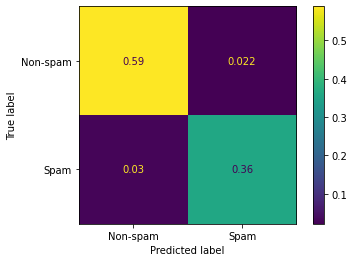

In [82]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_features='auto', max_samples=0.6, max_depth=20, oob_score=True)
rf_classifier.fit(train_x, train_y)
print(f'Out-of-bag accuracy estimate: {rf_classifier.oob_score_}')
predictions = rf_classifier.predict(test_x)
ConfusionMatrixDisplay.from_predictions(y_true = test_y, y_pred=predictions, normalize='all')